In [4]:
"""***************************** 5th April'23 Assignment *****************************"""

"***************************** 5th April'23 Assignment *****************************"

### You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:

1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link: https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [59]:
df = pd.read_csv('diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [60]:
df.shape

(768, 9)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [62]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [63]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

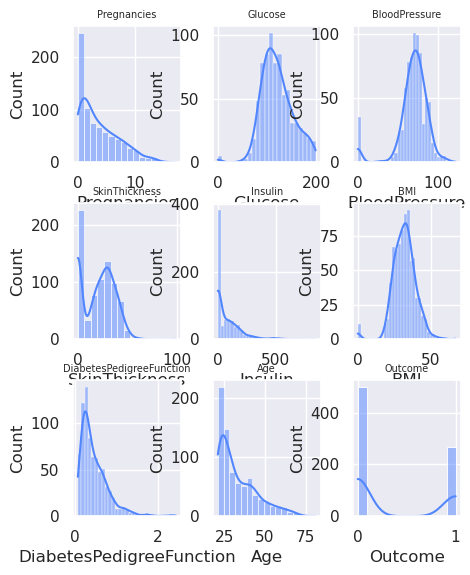

In [64]:
x = 1
plt.figure(figsize=(5,5))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.3)
for i in df.columns:
    plt.subplot(3,3,x)
    x = x+1
    sns.histplot(data=df,x=i,kde='true',color='#5286ff')
    plt.title(f'{i}', fontsize=7)
plt.show()

In [65]:
df_corr = df.corr()
df_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: >

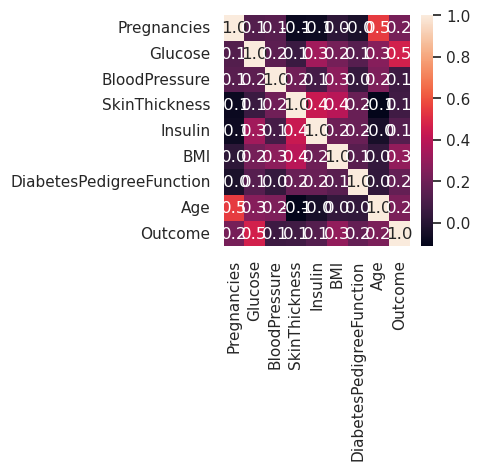

In [66]:
plt.figure(figsize=(3,3))
sns.heatmap(df_corr,annot=True,fmt='.1f')

#### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical varibles into dummy variables if necessary.

In [67]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [72]:
def outlier_rm(df,column):
    q1 = np.percentile(df[column],25)
    q3 = np.percentile(df[column],75)
    IQR = q3-q1
    Lower_bound = q1 - 1.5*IQR
    Upper_bound = q3 + 1.5*IQR
    return df[(df[column] >= Lower_bound) & (df[column] <= Upper_bound)]

for i in df.columns[:-1]:
    df = outlier_rm(df,i)

In [73]:
df = pd.get_dummies(df)
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [77]:
# dependeent and independent
df = df.dropna()
X = df.drop(labels=['Outcome'],axis=1)
y = df[['Outcome']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (473, 8)
X_test shape: (119, 8)
y_train shape: (473, 1)
y_test shape: (119, 1)


#### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [78]:
# Defining the parameters for GridSearchCV
parameters = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9],
    'max_features':['sqrt','log2']
}

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
d_t_c = DecisionTreeClassifier()
gs_cv = GridSearchCV(d_t_c,param_grid=parameters,cv=5,scoring='roc_auc')
gs_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [79]:
gs_cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

#### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [80]:
dtc_best = gs_cv.best_estimator_
dtc_best.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features='log2', splitter='random')

In [81]:
y_pred = dtc_best.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1])

In [83]:
from sklearn.metrics import classification_report
print('Classifier report : \n',classification_report(y_test,y_pred))

Classifier report : 
               precision    recall  f1-score   support

           0       0.71      0.81      0.76        80
           1       0.44      0.31      0.36        39

    accuracy                           0.65       119
   macro avg       0.58      0.56      0.56       119
weighted avg       0.62      0.65      0.63       119



In [91]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.6470588235294118
Precision: 0.4444444444444444
Recall: 0.3076923076923077
F1 Score: 0.3636363636363637


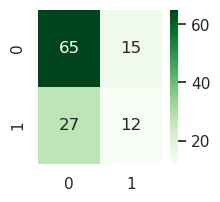

In [95]:
from sklearn.metrics import confusion_matrix
confuse_mat = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(2,2))
sns.heatmap(confuse_mat, annot=True,fmt='d',cmap="Greens")
plt.show()

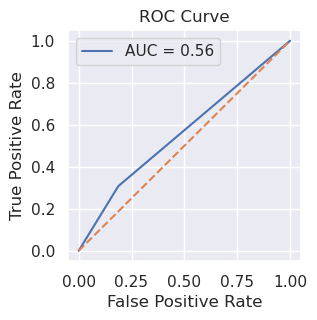

In [102]:
from sklearn.metrics import roc_curve,roc_auc_score
false_positive, true_positive, thresholds = roc_curve(y_test,y_pred)

auc = roc_auc_score(y_test,y_pred)

plt.figure(figsize=(3,3))
plt.plot(false_positive, true_positive, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

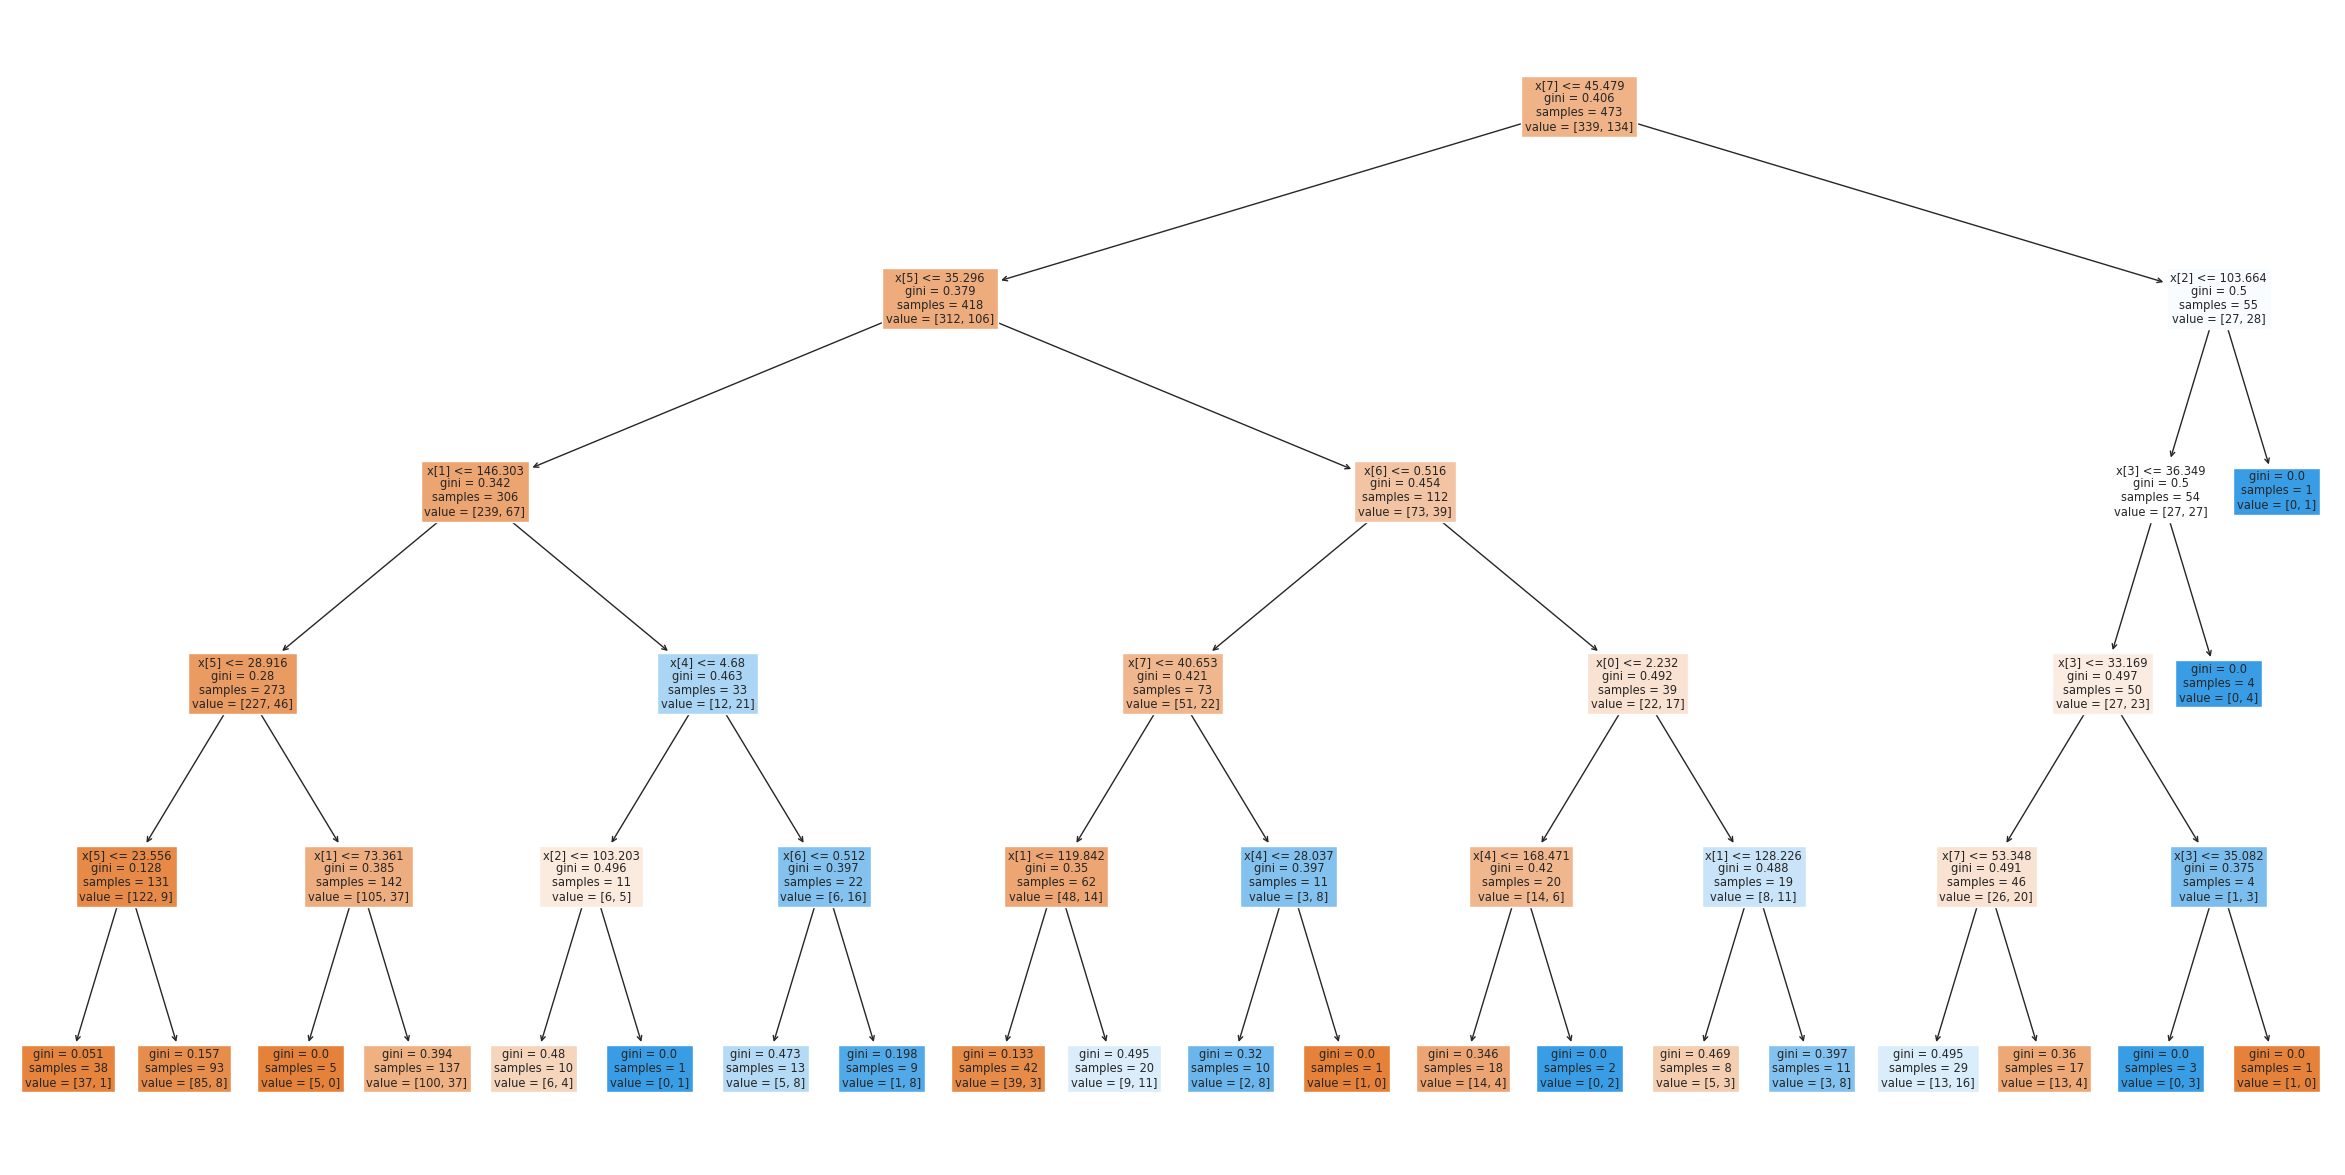

In [105]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 15))
plot_tree(dtc_best, filled=True)
plt.show()

#### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

#### Ans.
One way to validate the decision tree model is to apply it to new data that was not used in training or testing. This can help determine if the model can generalize to unseen data and perform well in real-world scenarios. Another way to test the robustness of the model is to perform sensitivity analysis and scenario testing. To validate the decision tree model, we can apply it to new data that was not used for training or testing. This can help us assess the generalizability of the model and its ability to perform well on unseen data. Also, we can simulate different scenarios to test its robustness and generalizability.

One way to do this is to use a hold-out dataset, which is a set of data that was not used for training or tuning the model. We can apply the trained decision tree model to this hold-out dataset and evaluate its performance using the same metrics as before, such as accuracy, precision, recall, and F1 score. If the performance of the model on the hold-out dataset is similar to the performance on the test set, it suggests that the model is able to generalize well to new data.

Sensitivity analysis involves varying the input variables and observing the effect on the output. For example, we can test how sensitive the model is to changes in the threshold values used for splitting the nodes. We can also test how sensitive the model is to changes in the relative importance of the input variables.

Scenario testing involves simulating different scenarios and testing the model's performance under different conditions. For example, we can test how the model performs when the prevalence of diabetes in the population changes, or when the distribution of the input variables changes due to changes in the environment or population demographics.

Robustness testing involves testing the model's performance under different environmental conditions, such as changes in the data collection process or changes in the population being studied. This can help us determine if the model is still accurate and reliable in different contexts.

By performing sensitivity analysis and scenario testing, we can gain insights into the uncertainty and risks associated with the model and identify areas for improvement or further research.

Overall, validation is an important step in the model development process to ensure that the model is robust, accurate, and reliable in different scenarios and contexts. Validating a decision tree model involves assessing its performance on new data and testing its robustness and generalizability under different scenarios and conditions. This can help us gain confidence in the model's ability to make accurate predictions and support decision-making in real-world applications.

There are several ways to validate a decision tree model and test its robustness. Here are a few techniques:

- ***Cross-validation:*** Cross-validation is a technique that involves dividing the dataset into several subsets and using each subset as a test set while using the remaining subsets as the training set. This technique can help evaluate the model's performance on different subsets of the data and avoid overfitting.
- ***Holdout testing:*** Holdout testing involves splitting the dataset into two parts: a training set and a testing set. The model is trained on the training set and then tested on the testing set. This technique can help evaluate the model's performance on unseen data.
- ***Sensitivity analysis:*** Sensitivity analysis involves varying the input variables and observing how the output changes. This technique can help assess how sensitive the model is to changes in the data and can identify which variables have the greatest impact on the output.
- ***Scenario testing:*** Scenario testing involves testing the model's performance under different scenarios or assumptions. For example, one might test the model's performance if there is missing data, if there are errors in the input data, or if the distribution of the input data changes